## Network Intrusion EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Attributes

### Load the data

In [5]:
#Read files
col_names = pd.read_csv('../../cyber-security-project/Field Names.csv', header=None)
train_feature_df = pd.read_csv('../../cyber-security-project/KDDTrain+.csv', header=None)
test_feature_df = pd.read_csv('../../cyber-security-project/KDDTest+.csv', header=None)

In [6]:
#Rename columns
train_feature_df.rename(columns=col_names[0], inplace=True)
test_feature_df.rename(columns=col_names[0], inplace=True)

In [7]:
#Rename column 41 and drop column 42
train_feature_df.rename(columns={41:'attack_name'}, inplace=True)
train_feature_df.drop(columns=[42], axis=1, inplace=True)
test_feature_df.rename(columns={41:'attack_name'}, inplace=True)
test_feature_df.drop(columns=[42], axis=1, inplace=True)

This dataset contains 4 main categories of attacks: DOS, R2L, U2R, Probing

In [8]:
#Create new labels for data exploration
attack_dict = {
    'normal': 'normal',
    #DOS
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    #Probing
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',
    #R2L
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    #U2R
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

def mal_identifier(labels):
    if labels == 'normal':
        return 'normal'
    else:
        return 'malicious'
    
#def mal_identifier(labels):    
#    mal = ['DoS', 'Probe', 'R2L', 'U2R']
#    if labels in mal:
#        return 'malicious'
#    else:
#        return 'normal'

In [9]:
train_feature_df['labels_5cat'] = train_feature_df['attack_name'].map(attack_dict)
test_feature_df['labels_5cat'] = test_feature_df['attack_name'].map(attack_dict)

In [10]:
train_feature_df['labels_2cat'] = train_feature_df.labels_5cat.apply(mal_identifier)
test_feature_df['labels_2cat'] = test_feature_df.labels_5cat.apply(mal_identifier)

## Examine the data

In [11]:
train_feature_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_name,labels_5cat,labels_2cat
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS,malicious
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal,normal


### Use .info() to see length and dtypes


In [12]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [13]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 44 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

### Check for duplicates

In [14]:
train_feature_df.duplicated().sum()

0

In [15]:
test_feature_df.duplicated().sum()

0

### Identify numerical and categorical variables

In [16]:
train_feature_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_name', 'labels_5cat',
       'labels_2cat'],
      dtype='object')

In [17]:
categorical_cols = ['protocol_type', 'service', 'flag']
binary_cols = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
numeric_cols = ['duration', 'src_bytes','dst_bytes', 'wrong_fragment', 'urgent', 
                'hot', 'num_failed_logins', 'num_compromised',
                'num_root', 'num_file_creations', 'num_shells',
                'num_access_files', 'num_outbound_cmds','count', 'srv_count', 'serror_rate',
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                'dst_host_srv_count', 'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate']

### Summarize categorical, numerical, and binary variables

In [18]:
train_feature_df.loc[:, train_feature_df.columns.isin(categorical_cols)].describe().round(2)

,protocol_type,service,flag
count,125973,125973,125973
unique,3,70,11
top,tcp,http,SF
freq,102689,40338,74945


In [19]:
train_feature_df.loc[:, train_feature_df.columns.isin(numeric_cols)].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.14,2604.52,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.74,5870331.18,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.11,4021269.15,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.02,0.25,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.00,0.01,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.20,2.15,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.00,0.05,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.28,23.94,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.30,24.40,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.01,0.48,0.0,0.00,0.00,0.00,4.300000e+01


``num_failed_logins`` has all 0 values, it will dropped due to redundancy 

In [20]:
pd.crosstab(train_feature_df.num_outbound_cmds, train_feature_df.labels_2cat)

labels_2cat,malicious,normal
num_outbound_cmds,,
0,58630,67343


In [21]:
#Drop num_outbound_cmds from train and test
train_feature_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_feature_df.drop('num_outbound_cmds', axis=1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [22]:
train_feature_df.loc[:, train_feature_df.columns.isin(binary_cols)].describe().round(2)

,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
count,125973.00,125973.00,125973.00,125973.00,125973.0,125973.00
mean,0.00,0.40,0.00,0.00,0.0,0.01
std,0.01,0.49,0.04,0.05,0.0,0.10
min,0.00,0.00,0.00,0.00,0.0,0.00
25%,0.00,0.00,0.00,0.00,0.0,0.00
50%,0.00,0.00,0.00,0.00,0.0,0.00
75%,0.00,1.00,0.00,0.00,0.0,0.00
max,1.00,1.00,1.00,2.00,1.0,1.00


su_attempted shows **3** variables [0,1,2] but it should be a binary feature [0,1]

**note for su_attemped**: ``1 if su root command attempted or used; 0 otherwise``


In [23]:
pd.crosstab(train_feature_df.su_attempted, train_feature_df.labels_2cat)

labels_2cat,malicious,normal
su_attempted,,
0,58629,67264
1,1,20
2,0,59


In [24]:
pd.crosstab(test_feature_df.su_attempted, test_feature_df.labels_2cat)

labels_2cat,malicious,normal
su_attempted,,
0,12832,9707
1,1,1
2,0,2


In [25]:
# 2 value is replaced to 0 for both train and test datasets
train_feature_df.su_attempted.replace(2, 0, inplace=True)
test_feature_df.su_attempted.replace(2, 0, inplace=True)

#### Count connection types( normal, malicious) and attack categories

In [26]:
train_feature_df['labels_2cat'].value_counts()

normal       67343
malicious    58630
Name: labels_2cat, dtype: int64

In [27]:
train_feature_df['labels_5cat'].value_counts()

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: labels_5cat, dtype: int64

## Visualizing Normal and Malicious connections

### By connection protocols

Most connections fall on ```TCP``` and contain most of the normal and malicious connections 

```UDP``` connections are predominantly normal 

```ICMP``` connections are predominantly malicious and are commonly used for probing and DOS attakcs

In [28]:
def c_graph(x, y, title, **kwargs):
    ctab = pd.crosstab(x, y)
    ctab_sorted = ctab.sort_values('normal', ascending=False)
    return ctab_sorted.plot(kind='bar', colormap='Set1', title=title, **kwargs)

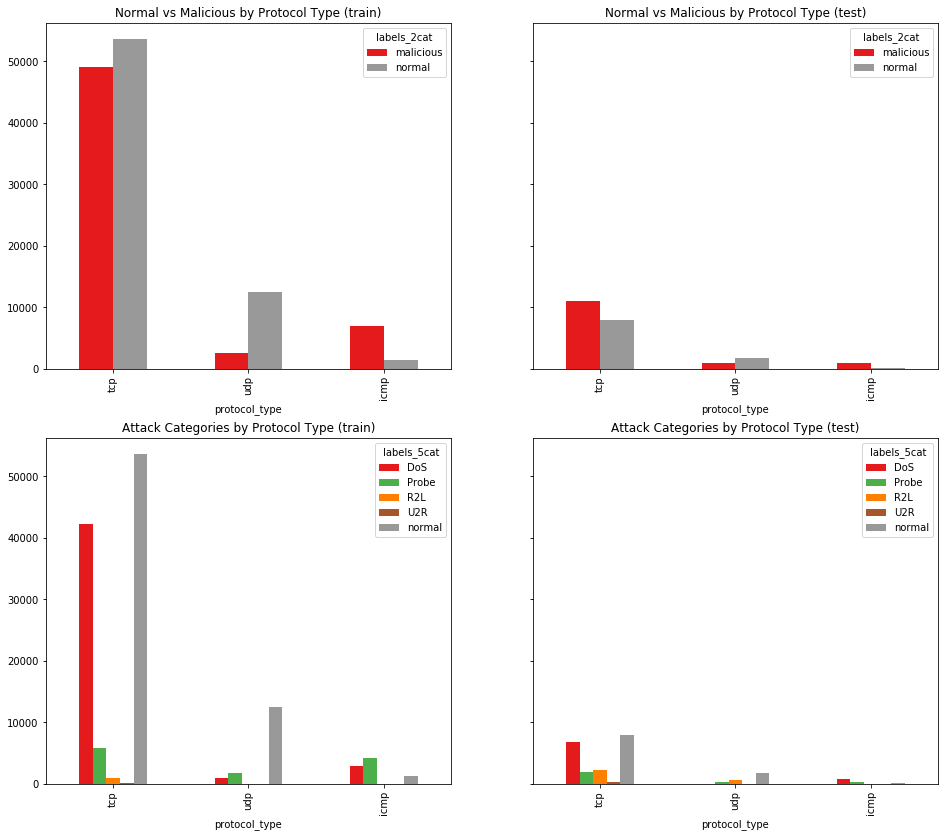

In [29]:
fig, ax_array = plt.subplots(2, 2, figsize=(16,14), sharey=True)
(ax1, ax2), (ax3, ax4) = ax_array
c_graph(train_feature_df.protocol_type, train_feature_df.labels_2cat, 'Normal vs Malicious by Protocol Type (train)', ax=ax1)
c_graph(test_feature_df.protocol_type, test_feature_df.labels_2cat, 'Normal vs Malicious by Protocol Type (test)', ax=ax2)
c_graph(train_feature_df.protocol_type, train_feature_df.labels_5cat, 'Attack Categories by Protocol Type (train)', ax=ax3)
c_graph(test_feature_df.protocol_type, test_feature_df.labels_5cat, 'Attack Categories by Protocol Type (test)', ax=ax4);

### By Connection Flags (status)

The plot below shows the connection type(normal or malicious) by status of the connection.

```SF``` - Most connections show a normal establishment and termination. Most are normal. (SYN/FIN)

```S0``` - This flag shows a connection attempt but no reply. Most are malicious

There are predominant malicious connections on the following flag states:

```REJ``` - Connection attempt rejected.

```RSTO``` - Connection established, originator aborted (sent a RST).

```RSTOS0``` - Originator sent a SYN followed by a RST, we never saw a SYN-ACK from the responder.

```RSTR``` - Responder sent a RST

```SH``` - Originator sent a SYN followed by a FIN, but never saw a SYN ACK from the responder (hence the connection was “half” open)

reference conn_state (flags): https://www.bro.org/sphinx/scripts/base/protocols/conn/main.bro.html?highlight=connection%20attempt%20rejected

labels_2cat  malicious  normal
flag                          
S0               34497     354
SF               11552   63393
REJ               8540    2693
RSTR              2275     146
RSTO              1343     219
SH                 269       2
RSTOS0             103       0
OTH                 35      11
S2                   8     119
S1                   4     361
S3                   4      45


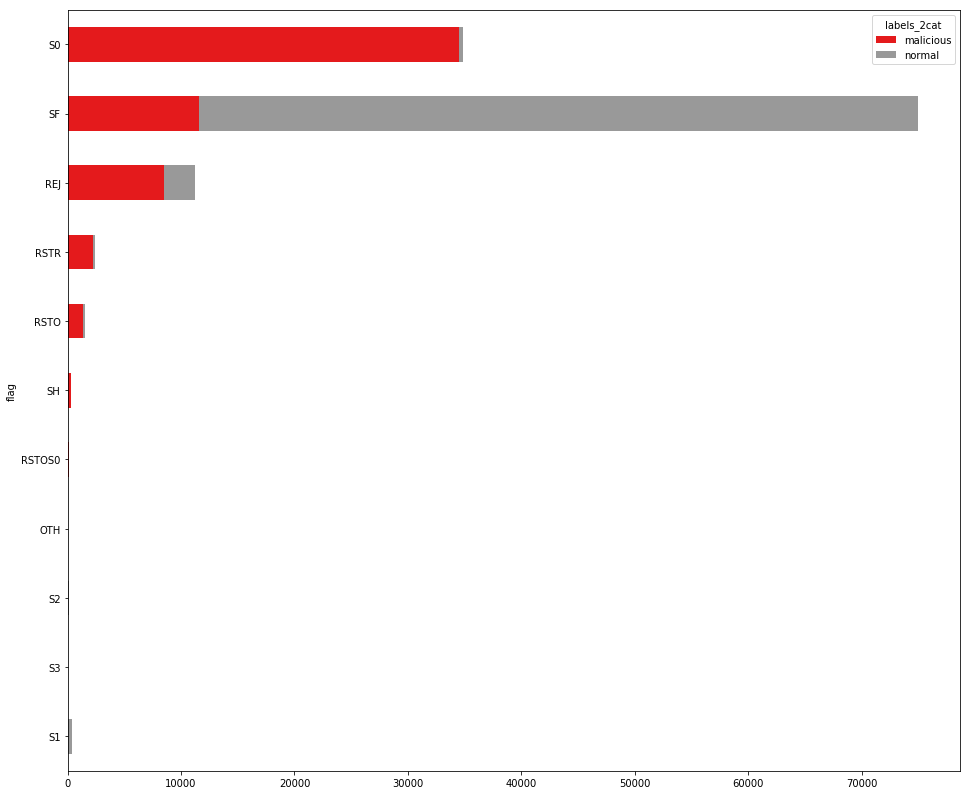

In [30]:
c = pd.crosstab(train_feature_df.flag, train_feature_df.labels_2cat).sort_values('malicious')
c.plot(kind='barh', colormap='Set1', figsize=(16,14), stacked=True)
print(pd.crosstab(train_feature_df.flag, train_feature_df.labels_2cat).sort_values('malicious', ascending=False))

#### Further analysis on flags by attack category

**DOS attacks** are dominant on ```REJ, RSTO, S0``` flags

**Probing** is dominant on ```OTH, RSTO0, RSTR, SH``` flags

In [31]:
flags_df = pd.crosstab(train_feature_df.flag, train_feature_df.labels_5cat)
flags_df.style.bar(subset=['DoS','Probe','R2L','U2R', 'normal'], color=['#5fba7d'], axis=1)

labels_5cat,DoS,Probe,R2L,U2R,normal
flag,,,,,
OTH,0,35,0,0,11
REJ,5671,2869,0,0,2693
RSTO,1216,80,46,1,219
RSTOS0,0,103,0,0,0
RSTR,90,2180,5,0,146
S0,34344,153,0,0,354
S1,2,1,1,0,361
S2,5,2,1,0,119
S3,0,1,3,0,45


### By network service

```private, eco_i, ecr_i``` - malicious attacks are dominant on these services

```http``` - most of the connections are normal but malicious activity exist

```smtp, domain_u, urp_i``` - are primarly normal with very few malicious activity

There's a long tail of network services that are used for malicious activities 


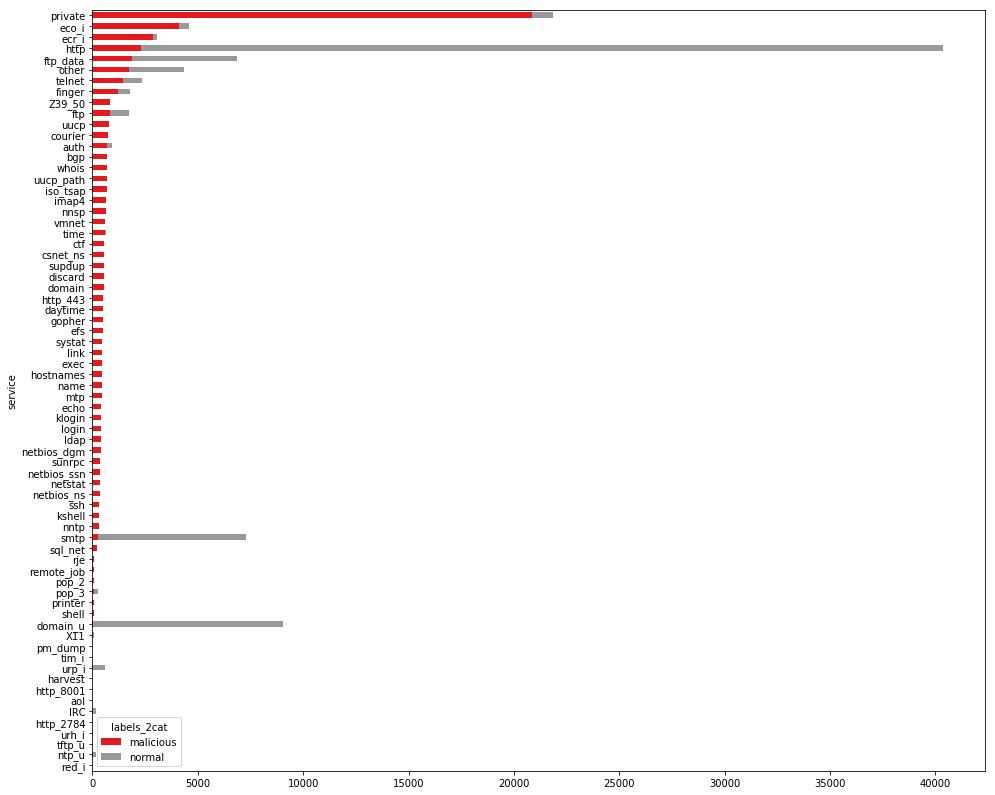

In [32]:
ns = pd.crosstab(train_feature_df.service, train_feature_df.labels_2cat).sort_values('malicious')
ns.plot(kind='barh', colormap='Set1', figsize=(16,14), stacked=True);
#print(pd.crosstab(train_feature_df.service, train_feature_df.labels_2cat).sort_values('malicious', ascending=False))

In [77]:
service_df = pd.crosstab(train_feature_df.service, train_feature_df.labels_5cat)
service_df.style.bar( color=['#5fba7d'], axis=1)

labels_5cat,DoS,Probe,R2L,U2R,normal
service,,,,,
IRC,0,1,0,0,186
X11,0,6,0,0,67
Z39_50,851,11,0,0,0
aol,0,2,0,0,0
auth,703,16,0,0,236
bgp,699,11,0,0,0
courier,726,8,0,0,0
csnet_ns,533,12,0,0,0
ctf,538,25,0,0,0


-------------------

In [3]:
from sklearn.decomposition import PCA
from matplotlib.patches import Circle


def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

def myPCA(df, clusters=None):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA(n_components='mle')
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
	plt.show()
	# Circle of correlations
	# http://stackoverflow.com/a/22996786/1565438
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	circleOfCorrelations(pc_infos, ebouli)
	plt.show()
	# Plot PCA
	dat = pd.DataFrame(pca_res, columns=cols)
	if isinstance(clusters, np.ndarray):
		for clust in set(clusters):
			colors = list("bgrcmyk")
			plt.scatter(dat["PC-0"][clusters==clust],dat["PC-1"][clusters==clust],c=colors[clust])
	else:
		plt.scatter(dat["PC-0"],dat["PC-1"])
	plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.title("PCA")
	plt.show()
	return pc_infos, ebouli    

In [34]:
x = train_feature_df.loc[:, train_feature_df.columns.isin(numeric_cols)]

In [46]:
myPCA(x)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [37]:
df_norm = (x - x.mean()) / x.std()

In [50]:
pca = PCA(n_components=['mle'])
pca_res = pca.fit_transform(df_norm.values)


TypeError: '>=' not supported between instances of 'list' and 'int'